In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

import os
dir_path = 'D:/Cosmas/Desktop/CroqeeStuff/Croqee-app/server_python'

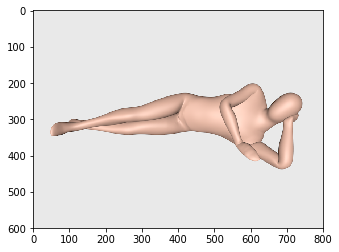

In [32]:
base_img = np.array(Image.open(dir_path + '/test_images/man-figure-5.png'))[:,:,:3]
plt.imshow(base_img)
plt.show()

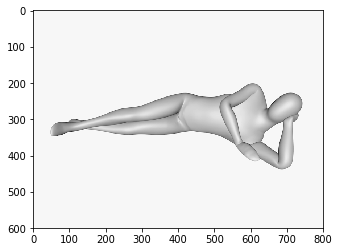

In [33]:
img1 = cv.cvtColor(base_img,cv.COLOR_BGR2GRAY)
plt.imshow(img1, cmap='gray')
plt.show()

In [34]:
def get_edge_magnitude(img, ksize=7):
    if len(img.shape) == 2: img = img[:, :, None]
    out_magnitude = np.zeros(img.shape[:2])
    for i in range(img.shape[2]):
        dx = cv.Sobel(img[:,:,i], cv.CV_64F, 1, 0, ksize=ksize)
        dy = cv.Sobel(img[:,:,i], cv.CV_64F, 0, 1, ksize=ksize)
        laplace = cv.Laplacian(img[:,:,i], cv.CV_64F, ksize=ksize)
        out_magnitude += np.abs(laplace) + np.sqrt(dx**2 + dy**2)
    out_magnitude = cv.GaussianBlur(out_magnitude, (ksize, ksize), sigmaX = ksize/2, sigmaY = ksize/2)
    out_magnitude /= max(np.sum(out_magnitude, 1))
    return out_magnitude


def get_line_maxima(edge_mag, ksize=5, offset=8):
    xx = np.zeros((ksize, 1), dtype=np.uint8)
    xx[0] = 1
    xx[-1] = 1
    yy = xx.T
    xy = np.zeros((ksize, ksize), dtype=np.uint8)
    xy[0,0] = 1
    xy[-1,-1] = 1
    yx = xy[::-1,:]
    
    xx_max = cv.dilate(edge_mag, xx, iterations=1)<=edge_mag-offset
    yy_max = cv.dilate(edge_mag, yy, iterations=1)<=edge_mag-offset
    xy_max = cv.dilate(edge_mag, xy, iterations=1)<=edge_mag-offset
    yx_max  = cv.dilate(edge_mag, yx, iterations=1)<=edge_mag-offset
    
    return np.any([xx_max, yy_max, xy_max, yx_max], axis=0)

def create_line_drawing2(base_img, thres1=8):
    edge_mag = get_edge_magnitude(base_img, ksize=3)
    edge_mag = (edge_mag*255/np.max(edge_mag)).astype(np.uint8)

    edge_norm = cv.GaussianBlur(edge_mag, (21, 21), sigmaX = 17, sigmaY = 17)

    tmp1 = get_line_maxima(edge_mag, ksize=5, offset=thres1)
    tmp1 *= (edge_mag > thres1)

    return (255 * (1-tmp1)).astype(np.uint8)
    
    
        

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


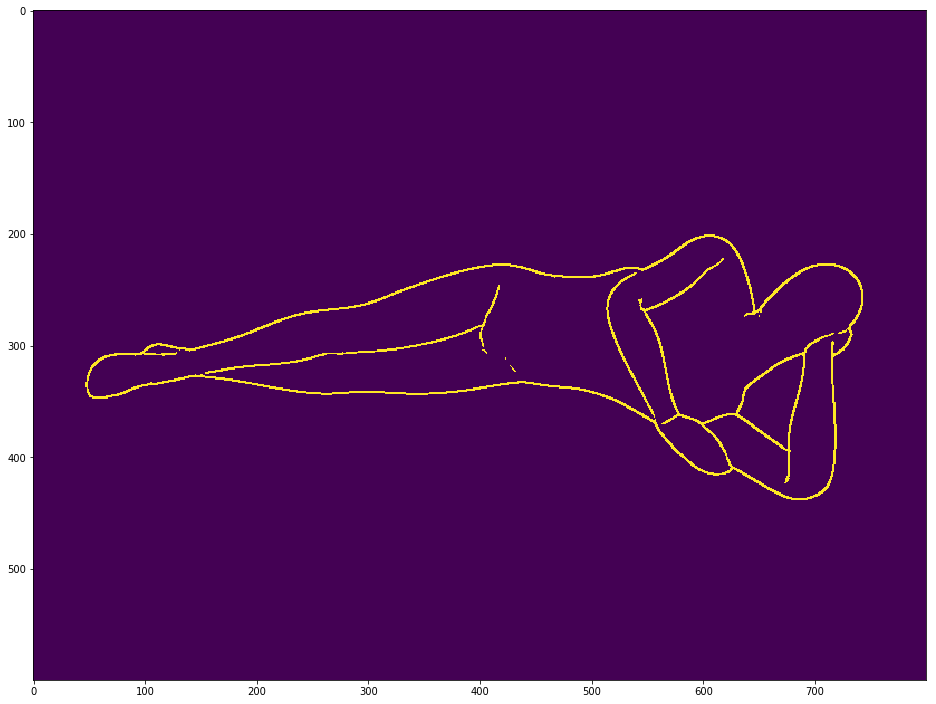

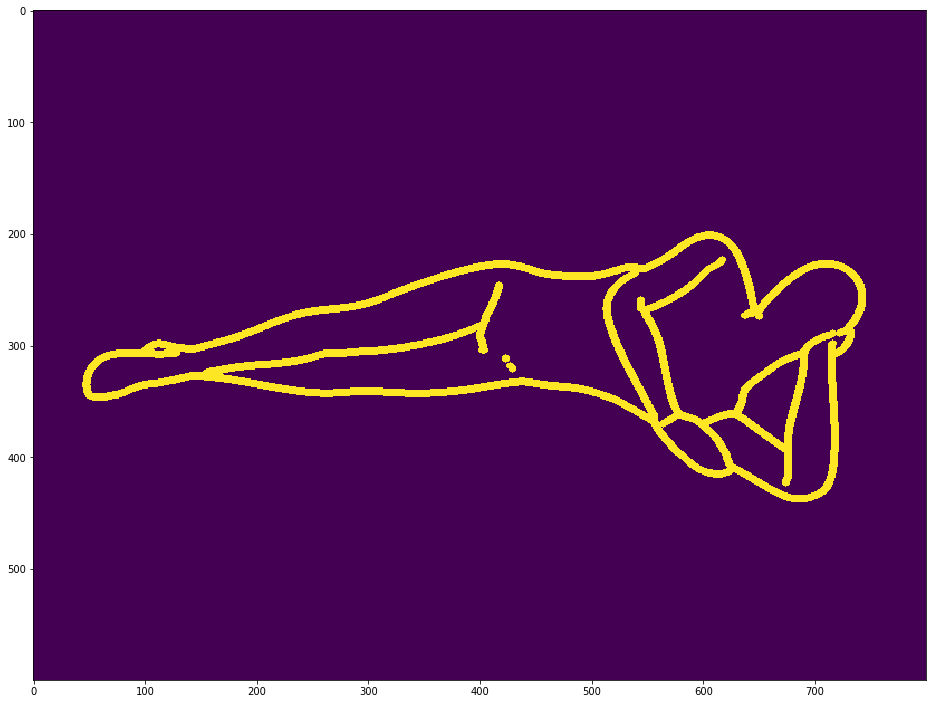

In [43]:


line_img = 255-create_line_drawing2(base_img)

f = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
print(f)

#line_img = cv.dilate(line_img, f, iterations=1)
thinned_img = cv.ximgproc.thinning(line_img)
new_line_img = cv.dilate(thinned_img, f, iterations=1)


plt.figure(figsize=(16,16))
plt.imshow(line_img)
plt.figure(figsize=(16,16))
plt.imshow(new_line_img)
plt.show()
